# Indego
Indego, Philadelphia’s bike-share program, offers 24-hour, 30-day, and yearly pass options to ride one of the hundreds of bright blue bicycles, and white electric-assist bicycles stationed at more than 140 stations around the city. In this project, we will analyze 4 quarters of Indego data during the 2020 year.
You can find more information about Indego on its site https://www.rideindego.com/.

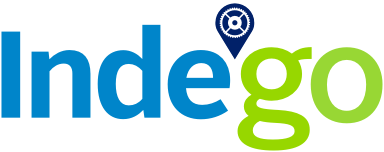

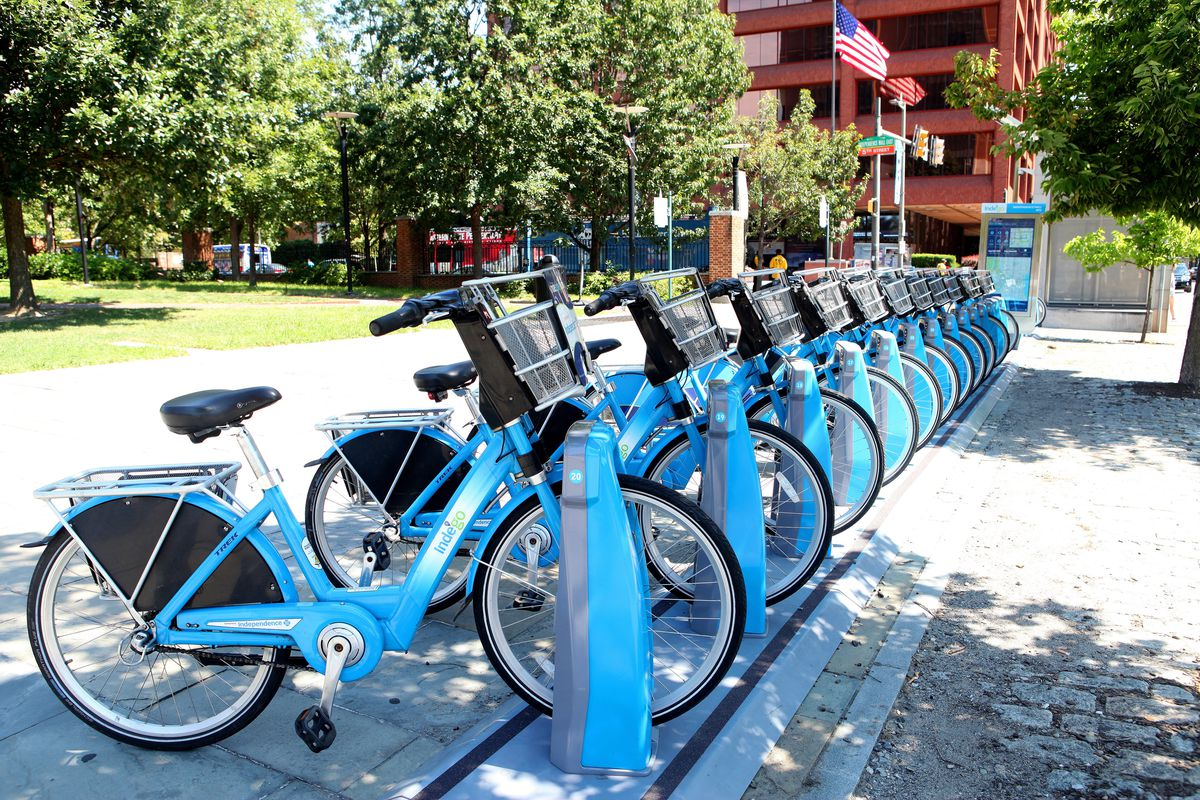


In [ ]:
!pip install plotly-express

import pandas as pd
import requests
import plotly.express as px 
import matplotlib.pyplot as plt
from io import StringIO
from math import cos, sin, asin, sqrt, pi, isnan
import time
from collections import Counter

Extract CSV into dataframe

In [ ]:
# function to extract csv into df
def get_df(orig_url):
  file_id = orig_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
  url = requests.get(dwn_url).text
  csv_raw = StringIO(url)
  df = pd.read_csv(csv_raw).iloc[:, 1:]
  return df

In [ ]:
#save into local dfs
q1_url = 'https://drive.google.com/file/d/1zhtl49EOcpEzH2S-gxefd2RiaLV6UxSl/view?usp=sharing'
q2_url = 'https://drive.google.com/file/d/1Tns5iyH5TYc3HiUQTBakN0ImFDLZ6Sk9/view?usp=sharing'
q3_url = 'https://drive.google.com/file/d/1ShNyG91sj8V7gwsqrZi4i1jmzuVngVsX/view?usp=sharing'
q4_url = 'https://drive.google.com/file/d/1J1z-8PNOPexhGWeGJlXjRN4od3nXULwo/view?usp=sharing'

q1_df = get_df(q1_url)
q2_df = get_df(q2_url)
q3_df = get_df(q3_url)
q4_df = get_df(q4_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
frames = [q1_df, q2_df, q3_df, q4_df]

#combine 4 quarters into 1 df
year_df = pd.concat(frames)

#drop all rows with nulls
year_df = year_df.dropna()
year_df 

,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,11,1/1/2020 0:13,1/1/2020 0:24,3049,39.945091,-75.142502,3072,39.934448,-75.145409,19794,30,One Way,Indego30,electric
1,28,1/1/2020 0:14,1/1/2020 0:42,3124,39.953621,-75.139542,3053,39.932308,-75.181541,19818,30,One Way,Indego30,electric
2,28,1/1/2020 0:14,1/1/2020 0:42,3124,39.953621,-75.139542,3053,39.932308,-75.181541,16510,30,One Way,Indego30,electric
3,21,1/1/2020 0:17,1/1/2020 0:38,3005,39.947330,-75.144028,3018,39.952728,-75.159790,16690,30,One Way,Indego30,electric
4,21,1/1/2020 0:17,1/1/2020 0:38,3005,39.947330,-75.144028,3018,39.952728,-75.159790,3423,30,One Way,Indego30,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160396,15,12/31/2020 23:37,12/31/2020 23:52,3102,39.967590,-75.179520,3028,39.940609,-75.149582,18186,30,One Way,Indego30,electric
160397,10,12/31/2020 23:38,12/31/2020 23:48,3064,39.938400,-75.173271,3164,39.928139,-75.165154,19757,365,One Way,Indego365,electric
160398,14,12/31/2020 23:41,12/31/2020 23:55,3028,39.940609,-75.149582,3124,39.953621,-75.139542,11950,30,One Way,Indego30,standard
160399,13,12/31/2020 23:42,12/31/2020 23:55,3028,39.940609,-75.149582,3124,39.953621,-75.139542,11728,30,One Way,Indego30,standard


Class for bike station locations



# Average bike ride duration in minutes

In [ ]:
year_df['duration'].mean()

27.321704388227932

# Passes that riders hold

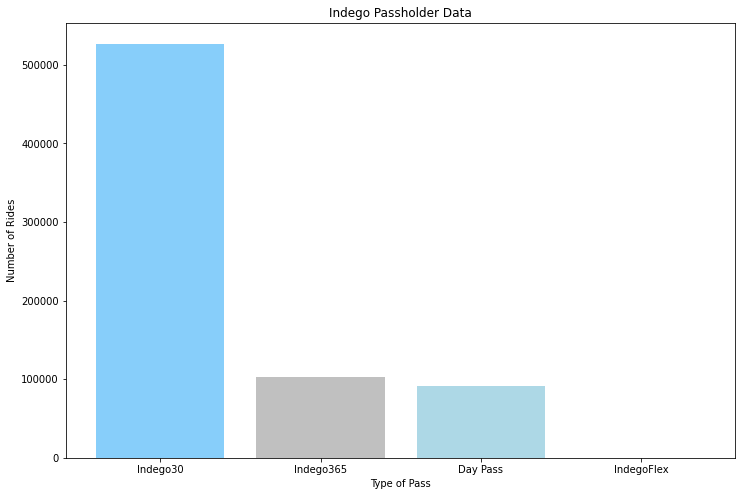

In [ ]:
passholder_graph_df = pd.DataFrame(year_df['passholder_type'].value_counts())
passholder_graph_df = passholder_graph_df.reset_index()
passholder_graph_df.columns = ['Passholder Type', 'Count']

colors = ['lightskyblue', 'silver', 'lightblue', 'steelblue']

plt.figure(figsize=(12,8))
plt.bar(passholder_graph_df['Passholder Type'], passholder_graph_df['Count'], color=colors)
plt.title('Indego Passholder Data')
plt.ylabel('Number of Rides')
plt.xlabel('Type of Pass')
plt.show()

# Electric vs Standard Bike Usage in Rides

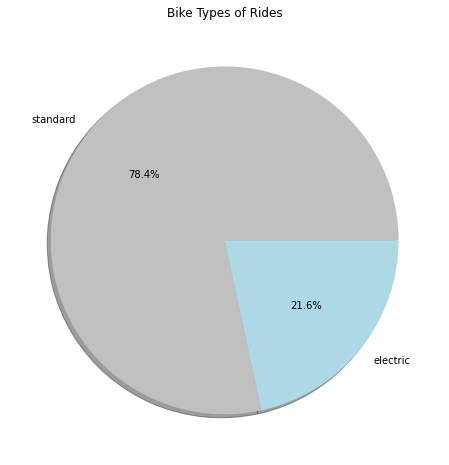

In [ ]:
bike_type_df = pd.DataFrame(year_df['bike_type'].value_counts())
bike_type_df = bike_type_df.reset_index()
bike_type_df.columns = ['Bike Type', 'Count']
bike_type_df
colors = ['silver', 'lightblue']

plt.figure(figsize=(12,8))
plt.pie(bike_type_df['Count'], labels = bike_type_df['Bike Type'], autopct='%1.1f%%', shadow = True, colors = colors)
plt.title('Bike Types of Rides')
plt.show()

Analyze the time people checkout bikes by breaking down and analyzing the start_time column.

In [ ]:
# Analyze the time people checkout bikes by breaking down and analyzing the start_time column.
start_time_list = year_df['start_time'].tolist()
start_time_date_list = []
start_time_time_list = []
for val in start_time_list:
  start_time_date_list.append(val.split()[0])
  start_time_time_list.append(val.split()[1])

date_dict = Counter(start_time_date_list)
time_dict = Counter(start_time_time_list)

# Number of Rides During Year 2020

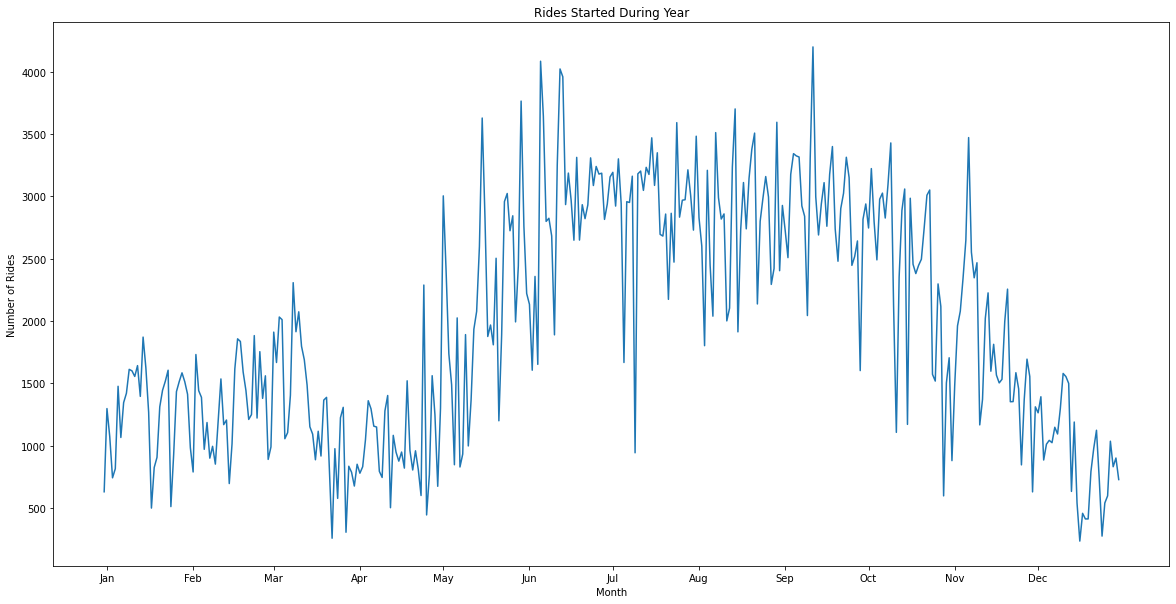

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Rides Started During Year')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

x = list(date_dict.keys())
y = list(date_dict.values())

plt.plot(x,y)

# Avoid the x-axis overcrowding by listing only months
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax = plt.gca()
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

plt.show()

# Average Number of Rides During the Day

In [ ]:
# sort the list in ascending time order
time_list = list(time_dict.keys())

format = '%H:%M'
time_hours = [time.strptime(t, format) for t in time_list]
time_list_key = [time.strftime(format, h) for h in sorted(time_hours)]
time_list_value = []
for key in time_list_key:
  time_list_value.append(time_dict.get(key))

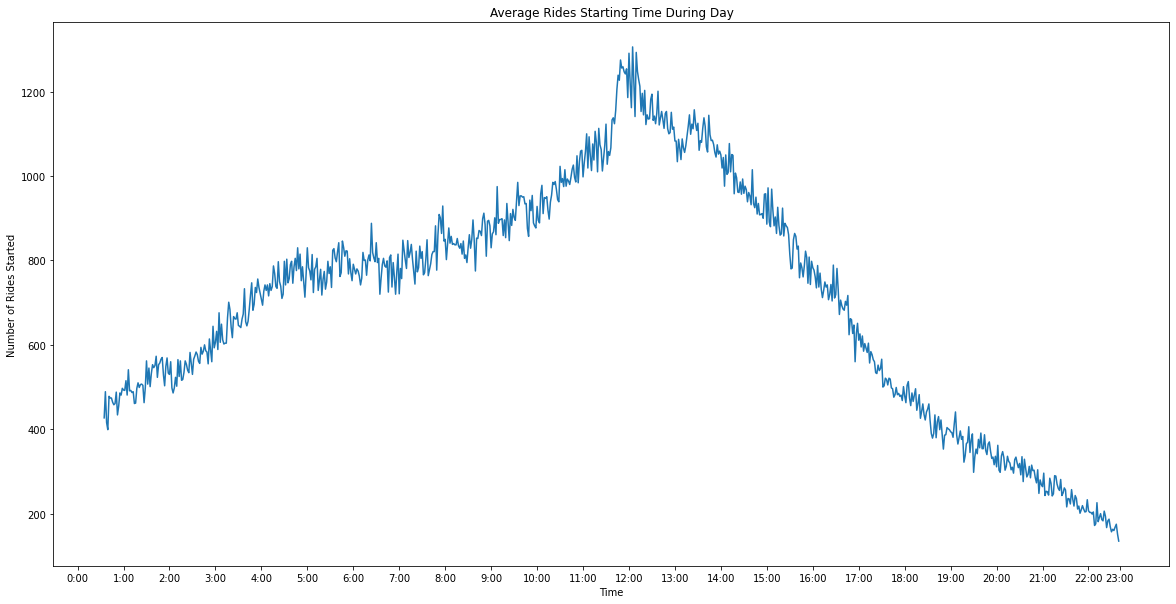

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Average Rides Starting Time During Day')
plt.xlabel('Time')
plt.ylabel('Number of Rides Started')

x = time_list_key
y = time_list_value
    
plt.plot(x,y)

# Avoid the x-axis overcrowding by listing only hour intervals
time_starts = [575,613,651,689,727,765,803,841,879,917,955,993,1031,1069,1107,1145,1183,1221,1259,1297,1335,1373,1411,1437]
time_names = ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'] 

ax = plt.gca()
ax.set_xticks(time_starts)
ax.set_xticklabels(time_names)

plt.show()

# All Stations and Coordinates

In [ ]:
#all stations and coordinates
stations_all_df = year_df.drop_duplicates(subset='start_station')
stations_all_df = stations_all_df[['start_station', 'start_lat', 'start_lon']]
stations_all_df = stations_all_df.rename(columns={'start_station': 'station', 'start_lat': 'lat', 'start_lon': 'lon'})
stations_all_df

,station,lat,lon
0,3049,39.945091,-75.142502
1,3124,39.953621,-75.139542
3,3005,39.947330,-75.144028
6,3208,39.950481,-75.193237
10,3047,39.950710,-75.149208
...,...,...,...
68463,3207,39.954411,-75.192001
1057,3212,39.963791,-75.181580
203382,3213,39.938869,-75.166634
243068,3214,39.978909,-75.157799


In [ ]:
#API key to use plotly
mapbox_key = 'pk.eyJ1IjoiYXpoYW5nOTkiLCJhIjoiY2tvNm00MnljMTBvNjJ2b25tMmk3enYwYSJ9.TCAMp8fypfXm7I5XfU2G4g'

# All Stations Plotted

In [ ]:
fig = px.scatter_mapbox(stations_all_df, lat="lat", lon="lon", zoom=11, hover_name='station', title='All Indego Stations')
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key) 
fig.show()

# Top 10 Start Stations

In [ ]:
start_df = pd.DataFrame(year_df['start_station'].value_counts())
start_df = start_df.reset_index()
start_df.columns = ['Start Station', 'Count']
start_df = start_df.head(10)
start_df = start_df.merge(stations_all_df,  left_on='Start Station', right_on='station', how = 'inner').drop('station', 1)
start_df

,Start Station,Count,lat,lon
0,3057,19712,39.964390,-75.179871
1,3010,13633,39.947109,-75.166183
2,3101,12333,39.942951,-75.159554
3,3052,12323,39.947319,-75.156952
4,3032,11841,39.945271,-75.179710
5,3054,11452,39.962502,-75.174202
6,3102,11449,39.967590,-75.179520
7,3190,11369,39.948921,-75.169907
8,3167,11132,39.950249,-75.160278
9,3045,10934,39.947922,-75.162369


In [ ]:
# Plot top 10 start stations
fig = px.scatter_mapbox(start_df, lat="lat", lon="lon", zoom=12, hover_name='Start Station', title='Top 10 Start Stations')
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key) 
fig.show()

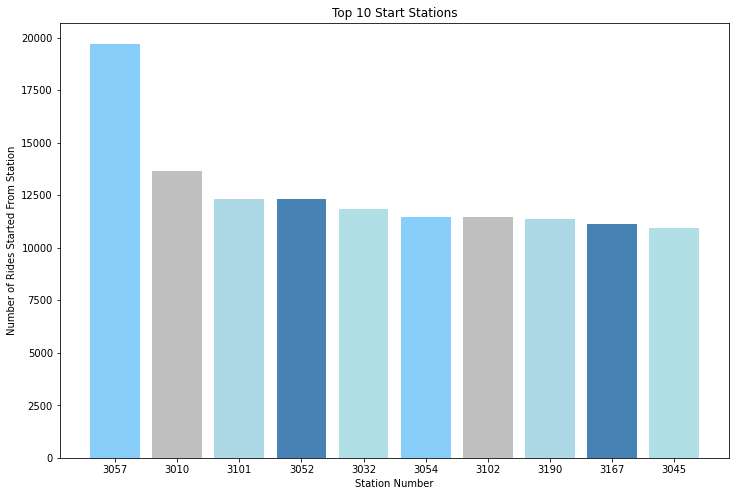

In [ ]:
colors = ['lightskyblue', 'silver', 'lightblue', 'steelblue', 'powderblue']
plt.figure(figsize=(12,8))
plt.bar(start_df['Start Station'].apply(str), start_df['Count'], color=colors)
plt.title('Top 10 Start Stations')
plt.ylabel('Number of Rides Started From Station')
plt.xlabel('Station Number')
plt.show()

# Top 10 End Stations

In [ ]:
#Top 10 end stations
end_df = pd.DataFrame(year_df['end_station'].value_counts())
end_df = end_df.reset_index()
end_df.columns = ['End Station', 'Count']
end_df = end_df.head(10)
end_df = end_df.merge(stations_all_df,  left_on='End Station', right_on='station', how = 'inner').drop('station', 1)
end_df

,End Station,Count,lat,lon
0,3057,19981,39.964390,-75.179871
1,3010,13508,39.947109,-75.166183
2,3101,12841,39.942951,-75.159554
3,3032,12440,39.945271,-75.179710
4,3052,12233,39.947319,-75.156952
5,3054,11772,39.962502,-75.174202
6,3102,11505,39.967590,-75.179520
7,3190,11419,39.948921,-75.169907
8,3167,11132,39.950249,-75.160278
9,3045,11069,39.947922,-75.162369


In [ ]:
# Plot top 10 end stations
fig = px.scatter_mapbox(end_df, lat="lat", lon="lon", zoom=12, hover_name='End Station', title='Top 10 End Stations')
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key) 
fig.show()

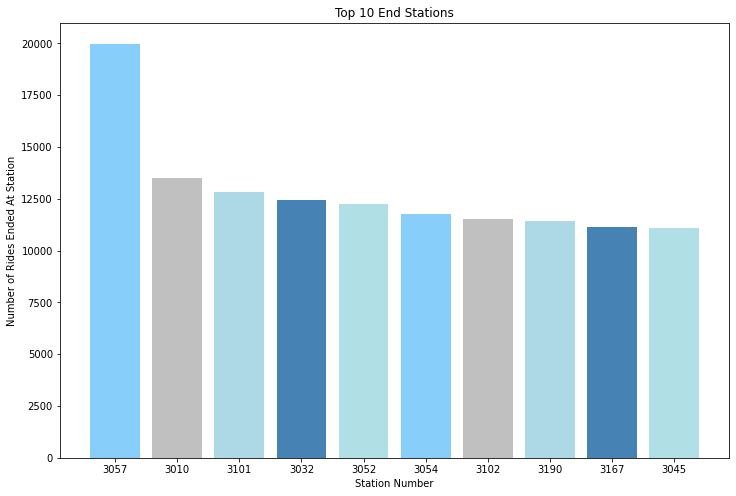

In [ ]:
colors = ['lightskyblue', 'silver', 'lightblue', 'steelblue', 'powderblue']
plt.figure(figsize=(12,8))
plt.bar(end_df['End Station'].apply(str), end_df['Count'], color=colors)
plt.title('Top 10 End Stations')
plt.ylabel('Number of Rides Ended At Station')
plt.xlabel('Station Number')
plt.show()

# Distance Between Top Stations

In [ ]:
class Location:
  def __init__(self, stationNum, frequency, lat, lon):
    self.station = stationNum
    self.freq = frequency
    self.lat = lat
    self.lon = lon

  def __str__(self): # string representation
    location = (self.lat, self.lon)
    return 'station:'+str(self.station)+' location:'+str(location)+' frequency:'+str(self.freq)

  # # # methods used for sorting stations
  def __gt__(self, other): # finds if this location is more popular than other
    return self.freq > other.freq

  def __le__(self, other): 
    return self.freq < other.freq

  def __eq__(self, other): # check if two stations are equal
    return self.station == other.station
  # # #
  
  def __ne__(self, other): # check if two stations are not equal
      return self.station != other.station

  def distance(self, other): # finds distance between this location and other location
    new_lat = other.lat 
    new_lon = other.lon
    radians = pi / 180
    hav = 0.5 - cos((new_lat-self.lat) * radians) / 2 
    hav2 = cos(self.lat*radians) * cos(new_lat*radians) * (1-cos((new_lon-self.lon)*radians)) / 2
    return 2 * 6378 * asin(sqrt(hav + hav2)) # in km

In [ ]:
# Dictionary with keys = stations; values = list of tuples of other stations and distance (km)
curr_dict = dict()
top_list = []
for index, row in start_df.head(3).iterrows(): # top 3 stations
  station = row['Start Station']
  curr_location = Location(int(row['Start Station']), row['Count'], row['lat'], row['lon'])
  top_list.append(curr_location)

for stat in top_list: # put locations in dictionary
  the_others = [x for x in top_list if stat != x]
  curr_list = []
  for other_station in the_others:
    distance = stat.distance(other_station)
    tup = (other_station, distance)
    curr_list.append(tup)
  curr_list = sorted(curr_list, key=lambda x: x[0], reverse=True) # sort list by popularity
  curr_list = [(x[0].station, x[1]) for x in curr_list] # put into dictionary
  curr_dict[int(stat.station)] = curr_list

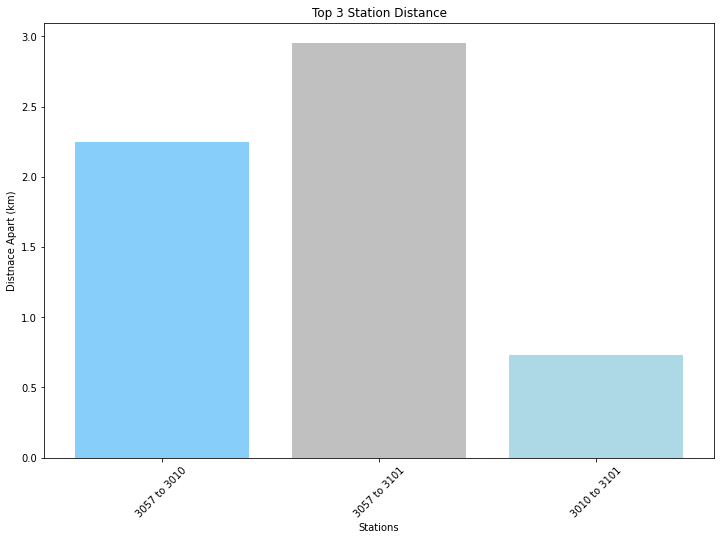

In [ ]:
# List of x and y labels- from and to stations
keys_list = list(curr_dict)
x_list = []

for i in range(len(curr_dict)):
  for j in range(i + 1, len(curr_dict)):
    x_list.append((str(keys_list[i]) + ' to ' + str(keys_list[j])))

y_list = [curr_dict.get(keys_list[1])[0][1], curr_dict.get(keys_list[0])[1][1], curr_dict.get(keys_list[1])[1][1]]
 
# Graph the results
colors = ['lightskyblue', 'silver', 'lightblue', 'steelblue']
plt.figure(figsize=(12,8))
plt.bar(x_list, y_list, color=colors)
plt.title('Top 3 Station Distance')
plt.ylabel('Distnace Apart (km)')
plt.xlabel('Stations')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [ ]:
# Plot top 3 visited stations
fig = px.scatter_mapbox(start_df.head(3), lat="lat", lon="lon", zoom=12, hover_name='Start Station', title='Top 3 Visited Stations')
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key) 
fig.show()